## Preprocessing

### 0. 사용 라이브러리

In [1]:
import pandas as pd
import numpy as np

from konlpy.tag import Okt
from konlpy.jvm import init_jvm # JVM을 초기화하는 함수 init_jvm을 제공

from pykospacing import Spacing # 한글 띄어쓰기 라이브러리
from hanspell import spell_checker # 한글 맞춤법 라이브러리
from tqdm import tqdm # 진행상황 Progress Bar를 위한 tqdm library

from tensorflow.keras.preprocessing.text import Tokenizer
 

### 1. 데이터 불러오기

In [65]:
# 데이터 불러오기

train_data = pd.read_table('./data/ratings_train.txt')
test_data = pd.read_table('./data/ratings_test.txt')

# 데이터 확인

print(train_data.info())# 150000 row
print(test_data.info()) # 50000 row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB
None


### 2. 데이터 정제

#### 2.1 중복값 처리

In [66]:
# train_data 중복값 확인

print('train_data id 중복값: ', train_data['id'].notnull().sum() - len(train_data['id'].unique()))
print('train_data document 중복값: ', train_data['document'].notnull().sum() - len(train_data['document'].unique()))

print('train_data label 값: ', train_data['label'].unique(), '\n') # 0, 1

# test_data 중복값 확인

print('test_data id 중복값: ', test_data['id'].notnull().sum() - len(test_data['id'].unique()))
print('test_data document 중복값: ', test_data['document'].notnull().sum() - len(test_data['document'].unique()))

print('test_data label 값: ', test_data['label'].unique(), '\n') # 0, 1

# 중복값 제거

train_data.drop_duplicates(['document'], inplace=True)
test_data.drop_duplicates(['document'], inplace=True)

print('train data 개수: ', len(train_data))
print('test_data 개수: ', len(test_data))

train_data id 중복값:  0
train_data document 중복값:  3812
train_data label 값:  [0 1] 

test_data id 중복값:  0
test_data document 중복값:  839
test_data label 값:  [1 0] 

train data 개수:  146183
test_data 개수:  49158


#### 2.2 구두점, 특수문자 제거

In [67]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','') # [ㄱ - ㅎ, ㅏ - ㅣ, 가 - 핳] 제외 제거
train_data['document'] = train_data['document'].str.replace('^ +', '') # 화이트 스페이스 제거

test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
test_data['document'] = test_data['document'].str.replace('^ +', '')

<ipython-input-67-152f18873e90>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','') # [ㄱ - ㅎ, ㅏ - ㅣ, 가 - 핳] 제외 제거
<ipython-input-67-152f18873e90>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +', '') # 화이트 스페이스 제거
<ipython-input-67-152f18873e90>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
<ipython-input-67-152f18873e90>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +', '')


#### 2.3 결측치 처리

In [68]:
# 결측치 확인


print(len(train_data[train_data['document']==""]), train_data['document'].isnull().sum()) # 비어있는 값("") 개수 확인
train_data.replace("", np.nan, inplace=True) # 비어있는 값("") 널값으로 변환

train_data[train_data['document'].isnull()==True]
print(train_data['document'].isnull().sum())

# 결측치 확인

print(len(test_data[test_data['document']==""]), test_data['document'].isnull().sum()) # 비어있는 값("") 개수 확인
test_data.replace("", np.nan, inplace=True) # 비어있는 값("") 널값으로 변환

test_data[test_data['document'].isnull()==True]
print(test_data['document'].isnull().sum())

# 결측치 제거

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# 결측치 확인

print(train_data['document'].isnull().sum(), test_data['document'].isnull().sum())
print(len(train_data), len(test_data))

789 1


,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0
...,...,...,...
149309,6715725,NaN,1
149358,6780491,NaN,0
149364,8014701,NaN,1
149630,3508604,NaN,0


### 3. 띄어쓰기, 맞춤법

In [58]:
spacing = Spacing()

test_sentence = train_data.iloc[1, 1]
spaced_sentence = spacing(test_sentence)
print(test_sentence)
print(spaced_sentence)

test_sentence = train_data.iloc[2, 1]
spaced_sentence = spacing(test_sentence)
print(test_sentence)
print(spaced_sentence)

test_sentence = train_data.iloc[10, 1]
spaced_sentence = spacing(test_sentence)
print(test_sentence)
print(spaced_sentence)

흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
흠포스터 보고 초딩 영화 줄오버 연기조차 가볍지 않구나


In [223]:
train_data['document'] = train_data['document'].apply(spacing)

In [72]:
test_data['document'] = test_data['document'].apply(spacing)

In [224]:
train_data.iloc[10]

id                      9008700
document    걍 인피니트가 짱이 다 진짜 짱이다
label                         1
Name: 10, dtype: object

In [73]:
test_data.iloc[10]

id                              8425305
document    한국독립영화의 한계 그렇게 아버지가 된다와 비교됨
label                                 0
Name: 11, dtype: object

In [227]:
spaced_train_data = train_data.copy()
spaced_train_data.to_csv('./data/ratings_train_spaced.csv', index=False)

In [75]:
spaced_test_data = test_data.copy()
spaced_test_data.to_csv('./data/ratings_test_spaced.csv', index=False)

### 띄어쓰기된 데이터 불러오기

In [126]:
train_data = pd.read_csv('./data/ratings_train_spaced.csv')

train_data

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터 보고 초딩 영화 줄오버 연기조차 가볍지 않구나,1
2,10265843,너무 재밓었다 그래서 보는 것을 추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬 페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어 보이기만 했던 커스...,1
...,...,...,...
145388,6222902,인간이 문제지 소는 뭔죄인가,0
145389,8549745,평점이 너무 낮아서,1
145390,9311800,이게 뭐 요 한국인은 거들 먹거리고 필리핀 혼혈은 착하다,0
145391,2376369,청춘 영화의 최고봉 방황과 우울했던 날들의 자화상,1


In [127]:
test_data = pd.read_csv('./data/ratings_test_spaced.csv')

test_data

,id,document,label
0,6270596,굳 ㅋ,1
1,8544678,뭐 야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
2,6825595,지루하지는 않은데 완전 막장 임 돈 주고 보기에는,0
3,6723715,만 아니었어도 별 다섯 개 줬을 텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
4,7898805,음악이 주가 된 최고의 음악영화,1
...,...,...,...
48847,4608761,오랜만에 평점 로긴 했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
48848,5308387,의지 박약들이나 하는 거 다 탈영은 일단 주인공 김대희 닮았고 이 등 병 찐 따,0
48849,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
48850,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해 먹네,0


### 3. 토큰화

형태소 분석기 종류

Okt(Open Korea Text), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)

#### 3.0 불용어 사전 불러오기

In [128]:
# 불용어 사전 불러오기
stopwords = pd.read_csv("./data/stopwords.csv", encoding='CP949')
stopwords = stopwords['stopwords']

stopwords_2 = pd.read_table("./data/stopwords_2.txt", names=['stopwords', '품사', 'ratio'])
stopwords_2 = stopwords_2['stopwords']

stopwords = pd.concat([stopwords, stopwords_2], axis=0)
stopwords.drop_duplicates(inplace=True)
stopwords.reset_index(inplace=True, drop=True)
print(len(stopwords))


664


#### 3.1 Okt 사용 토큰화

In [19]:
test_sentence = train_data.iloc[10, 1]

In [129]:
from konlpy.tag import Okt

okt = Okt()

print('OKT 형태소 분석 :',okt.morphs(test_sentence))
print('OKT 품사 태깅 :',okt.pos(test_sentence))
print('OKT 명사 추출 :',okt.nouns(test_sentence)) 

OKT 형태소 분석 : ['걍', '인피니트', '가', '짱', '이다', '진짜', '짱', '이다']
OKT 품사 태깅 : [('걍', 'Adverb'), ('인피니트', 'Noun'), ('가', 'Josa'), ('짱', 'Noun'), ('이다', 'Josa'), ('진짜', 'Noun'), ('짱', 'Suffix'), ('이다', 'Josa')]
OKT 명사 추출 : ['인피니트', '짱', '진짜']


In [130]:
okt_x_train = []

for sentence in tqdm(train_data['document']): # 진행상황 Progress Bar를 위한 tqdm library
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    okt_x_train.append(stopwords_removed_sentence)

100%|██████████| 145393/145393 [10:30<00:00, 230.71it/s]


In [119]:
okt_x_test = []
for sentence in tqdm(test_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    okt_x_test.append(stopwords_removed_sentence)

100%|██████████| 48852/48852 [05:43<00:00, 142.03it/s]


In [135]:
pd.Series(okt_x_train).to_csv("./data/okt_x_train.csv", index=False) 

In [136]:
pd.Series(okt_x_test).to_csv("./data/okt_x_test.csv", index=False)

In [122]:
okt_x_train = pd.read_csv('./data/okt_x_train.csv', encoding='CP949')
okt_x_train

,0
0,"['더빙', '진짜', '짜증나다', '목소리']"
1,"['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기'..."
2,"['너무', '재밓었다', '보다', '추천', '하다']"
3,"['교도소', '이야기', '구먼', '솔직하다', '재미', '는', '없다', ..."
4,"['사이', '몬', '페그', '익살스럽다', '연기', '돋보이다', '영화',..."
...,...
145388,"['인간', '문제', '지', '소', '는', '뭔', '죄인']"
145389,"['평점', '너무', '낮다']"
145390,"['게', '뭐', '요', '한국인', '은', '거들다', '먹거리', '고',..."
145391,"['청춘', '영화', '최고봉', '방황', '우울하다', '날', '자화상']"


In [121]:
okt_x_test = pd.read_csv('./data/okt_x_test.csv')
okt_x_test

,0
0,"['굳다', 'ㅋ']"
1,"['뭐', '야', '이', '평점', '들', '은', '나쁘다', '않다', '..."
2,"['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기..."
3,"['만', '아니다', '별', '다섯', '개', '주다', '텐데', '왜', ..."
4,"['음악', '이', '주가', '되다', '최고', '의', '음악', '영화']"
...,...
48847,"['오랜', '만', '에', '평점', '로', '기다', '하다', 'ㅋㅋ', ..."
48848,"['의지', '박약', '들', '이나', '하다', '거', '다', '탈영', ..."
48849,"['그림', '도', '좋다', '완성', '도도', '높다', '보다', '내내'..."
48850,"['절대', '보다', '서다', '안', '되다', '영화', '재미', '도',..."


In [133]:
# 빈도 수 확인

from nltk import FreqDist

vocab = FreqDist(np.hstack(okt_x_train))
vocab.most_common()

[('이', 65971),
 ('영화', 53650),
 ('하다', 49630),
 ('보다', 39641),
 ('의', 31674),
 ('에', 28207),
 ('가', 27188),
 ('을', 23876),
 ('도', 22100),
 ('들', 18154),
 ('다', 17889),
 ('는', 17263),
 ('없다', 17168),
 ('있다', 16492),
 ('은', 16354),
 ('를', 16128),
 ('좋다', 12112),
 ('너무', 11508),
 ('이다', 11343),
 ('되다', 11291),
 ('것', 10393),
 ('정말', 9761),
 ('만', 9737),
 ('안', 9267),
 ('거', 8908),
 ('게', 8791),
 ('재밌다', 8791),
 ('적', 8785),
 ('같다', 8603),
 ('진짜', 8385),
 ('한', 8099),
 ('으로', 8036),
 ('아니다', 7966),
 ('로', 7948),
 ('않다', 7736),
 ('점', 7688),
 ('연기', 7068),
 ('에서', 7034),
 ('만들다', 6868),
 ('나', 6852),
 ('과', 6801),
 ('나오다', 6785),
 ('보고', 6754),
 ('인', 6612),
 ('이렇다', 6592),
 ('수', 6490),
 ('평점', 6272),
 ('최고', 6110),
 ('내', 6081),
 ('고', 5993),
 ('요', 5875),
 ('못', 5823),
 ('자다', 5744),
 ('말', 5647),
 ('그', 5565),
 ('왜', 5522),
 ('스토리', 5362),
 ('생각', 5328),
 ('가다', 5305),
 ('드라마', 5216),
 ('때', 5179),
 ('듯', 5106),
 ('싶다', 5036),
 ('사람', 4972),
 ('더', 4915),
 ('감동', 4846),
 ('배우', 4552),
 

#### 3.2 꼬꼬마 Kkma 사용 토큰화

In [11]:
from konlpy.tag import Kkma

kkma = Kkma()

test_sentence = train_data.iloc[10, 1]

print('꼬꼬마 형태소 분석 :',kkma.morphs(test_sentence))
print('꼬꼬마 품사 태깅 :',kkma.pos(test_sentence))
print('꼬꼬마 명사 추출 :',kkma.nouns(test_sentence))

꼬꼬마 형태소 분석 : ['걍', '인피', '니트', '가', '짱', '이', '다', '진짜', '짱', '이', '다']
꼬꼬마 품사 태깅 : [('걍', 'MAG'), ('인피', 'NNG'), ('니트', 'NNG'), ('가', 'JKS'), ('짱', 'NNG'), ('이', 'JKS'), ('다', 'MAG'), ('진짜', 'MAG'), ('짱', 'NNG'), ('이', 'VCP'), ('다', 'EFN')]
꼬꼬마 명사 추출 : ['인피', '인피니트', '니트', '짱']


In [9]:
init_jvm(jvmpath=None, max_heap_size='9096M')

In [ ]:
kkma_x_train = []

for sentence in tqdm(train_data['document']): # 진행상황 Progress Bar를 위한 tqdm library
    tokenized_sentence = kkma.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    kkma_x_train.append(stopwords_removed_sentence)

#### 3.3 은전한닢 형태소 분석기 mecab

https://eunjeon.blogspot.com/

https://cleancode-ws.tistory.com/97

https://m.blog.naver.com/PostView.nhn?blogId=aul-_-&logNo=221557243190&proxyReferer=https:%2F%2Fwww.google.com%2F

#### 3.4 코모란 KOMORAN 사용 토큰화

#### 3.5 한나눔 Hannanum 사용 토큰화

### 4. 정수 인코딩

#### 4.1 Okt 데이터 정수 인코딩

In [138]:
okt_x_train = pd.read_csv('./data/okt_x_train.csv')
okt_x_train = pd.Series(okt_x_train['0'])
okt_x_train

okt_x_test = pd.read_csv('./data/okt_x_test.csv')
okt_x_test = pd.Series(okt_x_test['0'])
okt_x_test

0                                              ['굳다', 'ㅋ']
1        ['뭐', '야', '이', '평점', '들', '은', '나쁘다', '않다', '...
2        ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기...
3        ['만', '아니다', '별', '다섯', '개', '주다', '텐데', '왜', ...
4           ['음악', '이', '주가', '되다', '최고', '의', '음악', '영화']
                               ...                        
48847    ['오랜', '만', '에', '평점', '로', '기다', '하다', 'ㅋㅋ', ...
48848    ['의지', '박약', '들', '이나', '하다', '거', '다', '탈영', ...
48849    ['그림', '도', '좋다', '완성', '도도', '높다', '보다', '내내'...
48850    ['절대', '보다', '서다', '안', '되다', '영화', '재미', '도',...
48851                        ['마무리', '는', '또', '왜', '이렇다']
Name: 0, Length: 48852, dtype: object

In [139]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(okt_x_train)

threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합(vocabulary)의 크기 : 40505
등장 빈도가 2번 이하인 희귀 단어의 수: 22069
단어 집합에서 희귀 단어의 비율: 54.48463152697198
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.3582910434937219
단어 집합의 크기 : 18437


In [140]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(okt_x_train)
X_train = tokenizer.texts_to_sequences(okt_x_train)
X_test = tokenizer.texts_to_sequences(okt_x_test)

In [141]:
test_data

,id,document,label
0,6270596,굳 ㅋ,1
1,8544678,뭐 야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
2,6825595,지루하지는 않은데 완전 막장 임 돈 주고 보기에는,0
3,6723715,만 아니었어도 별 다섯 개 줬을 텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
4,7898805,음악이 주가 된 최고의 음악영화,1
...,...,...,...
48847,4608761,오랜만에 평점 로긴 했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
48848,5308387,의지 박약들이나 하는 거 다 탈영은 일단 주인공 김대희 닮았고 이 등 병 찐 따,0
48849,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
48850,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해 먹네,0


In [142]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

### 5. 패딩

In [143]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [144]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

145214
145214


C:\Users\Huitaek\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


리뷰의 최대 길이 : 129
리뷰의 평균 길이 : 13.677310727615795


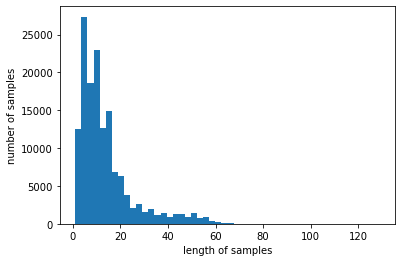

In [145]:
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [149]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

max_len = 45
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 45 이하인 샘플의 비율: 96.17598854104976


In [150]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [151]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

145214 48852 145214 48852


In [152]:
temp = pd.DataFrame(X_train)
temp.to_csv('./data/temp_dataset/X_train.csv', index=False)
temp = pd.DataFrame(X_test)
temp.to_csv('./data/temp_dataset/X_test.csv', index=False)
temp = pd.DataFrame(y_train)
temp.to_csv('./data/temp_dataset/y_train.csv', index=False)
temp = pd.DataFrame(y_test)
temp.to_csv('./data/temp_dataset/y_test.csv', index=False)

In [153]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, ep    ochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1816/1816 [==============================] - 93s 50ms/step - loss: 0.3918 - acc: 0.8220 - val_loss: 0.3791 - val_acc: 0.8409

Epoch 00001: val_acc improved from -inf to 0.84093, saving model to best_model.h5
Epoch 2/15
1816/1816 [==============================] - 97s 53ms/step - loss: 0.3270 - acc: 0.8587 - val_loss: 0.3359 - val_acc: 0.8524

Epoch 00002: val_acc improved from 0.84093 to 0.85236, saving model to best_model.h5
Epoch 3/15
1816/1816 [==============================] - 95s 52ms/step - loss: 0.3012 - acc: 0.8722 - val_loss: 0.3351 - val_acc: 0.8569

Epoch 00003: val_acc improved from 0.85236 to 0.85690, saving model to best_model.h5
Epoch 4/15
1816/1816 [==============================] - 103s 57ms/step - loss: 0.2819 - acc: 0.8823 - val_loss: 0.3213 - val_acc: 0.8603

Epoch 00004: val_acc improved from 0.85690 to 0.86031, saving model to best_model.h5
Epoch 5/15
1816/1816 [==============================] - 103s 57ms/step - loss: 0.2660 - acc: 0.8900 - val_loss: 0.

In [56]:
y_test

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1527/1527 [==============================] - 25s 16ms/step - loss: 0.3458 - acc: 0.8518

 테스트 정확도: 0.8518
